In [1]:
from engine import Tensor
import numpy as np
import nn
import torch

In [13]:
tensor = Tensor.randn((1, 2, 2))
print(tensor)
print(tensor[0, 0, 1])

[[[-0.14188337  0.15544805]
  [ 0.67341644 -1.1051617 ]]]
0.15544805


In [12]:
1 / np.sqrt(1)

NameError: name 'np' is not defined

In [11]:
import nn
# Need to read init paper for He
nn.Tensor.kaiming_uniform(1, 30, a=5).std()

5.118585

In [2]:
net = nn.MLP()

In [4]:
optim = nn.Optim(net.parameters, lr=0.005)

In [6]:
for i in net.parameters():
    print(i)

[[-0.78525263 -0.1976684   0.8286483   0.07783645]
 [ 0.789752   -0.31897607  0.7278545   0.28226167]
 [ 0.34771082  1.2519459  -0.10540349 -1.1219637 ]]
[[0. 0. 0. 0.]]
[[-0.8311333  -0.03916978 -0.5791169   0.81499755]
 [ 1.1743072  -0.31018126  0.26971522  0.49442998]
 [-0.14804089 -0.9064749  -0.22339837  1.08463   ]
 [-0.9072176  -0.3917086  -1.2101581  -0.55290174]]
[[0. 0. 0. 0.]]
[[-0.8743847   0.83821577 -0.02944837  0.14807577]
 [ 0.38702255  0.5949118   0.7385529  -0.48044434]
 [-0.9037269  -0.85515994 -0.220084    0.21743107]
 [-1.0241268   0.6509031   0.28726515  0.37080163]]
[[0. 0. 0. 0.]]
[[-0.43041804]
 [-0.04839627]
 [ 0.38061622]
 [-1.0915333 ]]
[[0.]]


In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

0 [1.2643766]
200 [1.0396409e-06]
400 [3.4201324e-08]
600 [1.1274537e-09]
800 [4.5151438e-11]
1000 [5.4427574e-12]
1200 [1.3322676e-12]
1400 [7.8870244e-13]
1600 [5.648815e-13]
1800 [4.938272e-13]
2000 [3.5704772e-13]
2200 [3.1974423e-13]
2400 [2.0428104e-13]
2600 [1.4921397e-13]
2800 [1.2434498e-13]
3000 [1.0658141e-13]
3200 [1.0658141e-13]
3400 [1.0658141e-13]
3600 [1.0658141e-13]
3800 [1.0658141e-13]
4000 [1.0658141e-13]
4200 [8.1712415e-14]
4400 [8.1712415e-14]
4600 [8.1712415e-14]
4800 [8.1712415e-14]
5000 [8.1712415e-14]
5200 [9.2370556e-14]
5400 [8.1712415e-14]
5600 [9.2370556e-14]
5800 [8.1712415e-14]
6000 [9.2370556e-14]
6200 [8.1712415e-14]
6400 [9.2370556e-14]
6600 [8.1712415e-14]
6800 [8.1712415e-14]
7000 [8.1712415e-14]
7200 [8.1712415e-14]
7400 [8.1712415e-14]
7600 [8.1712415e-14]
7800 [8.1712415e-14]
8000 [8.1712415e-14]
8200 [8.1712415e-14]
8400 [8.1712415e-14]
8600 [8.1712415e-14]
8800 [8.1712415e-14]
9000 [9.2370556e-14]
9200 [8.1712415e-14]
9400 [9.2370556e-14]
9600 

[[ 0.99999964]
 [-1.0000001 ]
 [-0.99999964]
 [ 1.0000002 ]]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


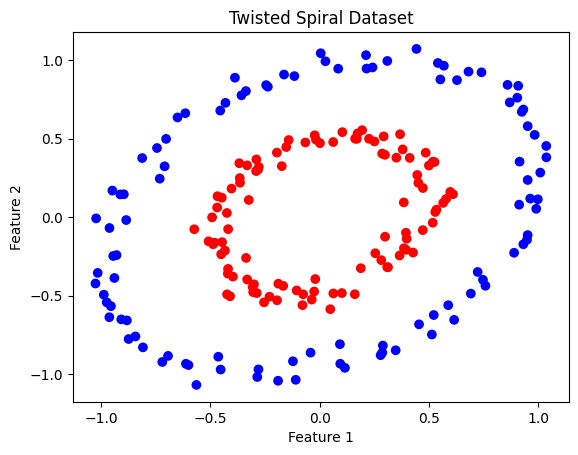

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [64]:
def kaiming_uniform(shape, gain=np.sqrt(2)):
    """
    Kaiming Uniform initialization (He initialization) for weight matrices.

    Args:
    shape (tuple): The shape of the weight matrix.
    gain (float): The scaling factor (recommended sqrt(2) for ReLU).

    Returns:
    numpy.ndarray: The initialized weights.
    """
    print(shape[:-1])
    fan_in = np.prod(shape[:-1])  # Product of dimensions except the last dimension
    std = gain / np.sqrt(fan_in)  # Calculate standard deviation
    limit = np.sqrt(3.0) * std  # Calculate limit for uniform distribution

    return np.random.uniform(-limit, limit, size=shape)

In [65]:
kaiming_uniform((1, 30)).std()

(1,)


1.3609795497380417

In [58]:
div = 1. / np.sqrt(1)

np.random.uniform(-div, div, (30, 1)).std()

0.5480296227365216

In [42]:
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor

kaiming_uniform_np(1, 30).std()

tensor(1.3837)

In [24]:
Tensor.kaiming_uniform(1, 30).data.std()

2.0763154

In [45]:
torch.nn.Linear(1, 30).weight.data.std()

tensor(0.6320)

In [2]:
import torch

In [4]:
import nn

iters = 10000
t_tensor_mean = 0
t_tensor_std = 0

n_tensor_mean = 0
n_tensor_std = 0
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=np.sqrt(5))
    return tensor

for _ in range(iters):
    t_tensor = kaiming_uniform_np(1, 30)
    # print(t_tensor.weight.data.shape)
    t_tensor_mean += torch.mean(t_tensor)
    t_tensor_std += torch.std(t_tensor)

    n_tensor = nn.Tensor.kaiming_uniform(1, 30, gain=np.sqrt(5))
    n_tensor_mean += np.mean(n_tensor.data)
    n_tensor_std += np.std(n_tensor.data)


print("Torch Mean:", t_tensor_mean/iters)
print("Torch STD:", t_tensor_std/iters)
print("Nano Mean:", n_tensor_mean/iters)
print("Nano STD:", n_tensor_std/iters)

Torch Mean: tensor(-0.0006)
Torch STD: tensor(0.5743)
Nano Mean: -0.0005825150759923418
Nano STD: 1.3842784321546555


In [3]:
import numpy as np

import torch
import nn

iters = 10000
t_tensor_mean = 0
t_tensor_std = 0

n_tensor_mean = 0
n_tensor_std = 0


for _ in range(iters):
    t_tensor = torch.nn.Linear(1, 30)
    # print(t_tensor.weight.data.shape)
    t_tensor = t_tensor.weight.data
    t_tensor_mean += torch.mean(t_tensor)
    t_tensor_std += torch.std(t_tensor)

    n_tensor = nn.Linear(1, 30)
    # print(n_tensor.weight.data.shape)
    n_tensor = n_tensor.weight.data
    n_tensor_mean += np.mean(n_tensor)
    n_tensor_std += np.std(n_tensor)


print("Torch Mean:", t_tensor_mean/iters)
print("Torch STD:", t_tensor_std/iters)
print("Nano Mean:", n_tensor_mean/iters)
print("Nano STD:", n_tensor_std/iters)

Torch Mean: tensor(0.0008)
Torch STD: tensor(0.5752)
Nano Mean: 0.00017077836060962
Nano STD: 0.5655065567523241


In [21]:
import nn
from engine import Tensor


# grads = []
# outs = []
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64) # Second hidden layer, 64 neurons
        self.output = nn.Linear(64, 1) # Output layer, 1 output value

    def __call__(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.001)

x = Tensor(xs)
y_real = Tensor(ys)

epochs = 5000

for epoch in range(epochs):
    y_pred = model(x)
    loss = ((y_pred - y_real)**2).mean(0)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
    
# y_pred

Epoch [10/5000], Loss: [1.0117592]
Epoch [20/5000], Loss: [1.0104387]
Epoch [30/5000], Loss: [1.0091352]
Epoch [40/5000], Loss: [1.0078523]
Epoch [50/5000], Loss: [1.0065882]
Epoch [60/5000], Loss: [1.0053421]
Epoch [70/5000], Loss: [1.0041183]
Epoch [80/5000], Loss: [1.002912]
Epoch [90/5000], Loss: [1.0017228]
Epoch [100/5000], Loss: [1.0005541]
Epoch [110/5000], Loss: [0.9994017]
Epoch [120/5000], Loss: [0.9982657]
Epoch [130/5000], Loss: [0.9971464]
Epoch [140/5000], Loss: [0.9960368]
Epoch [150/5000], Loss: [0.9949398]
Epoch [160/5000], Loss: [0.9938551]
Epoch [170/5000], Loss: [0.99278533]
Epoch [180/5000], Loss: [0.9917279]
Epoch [190/5000], Loss: [0.9906842]
Epoch [200/5000], Loss: [0.98965317]
Epoch [210/5000], Loss: [0.98863524]
Epoch [220/5000], Loss: [0.98762983]
Epoch [230/5000], Loss: [0.98663497]
Epoch [240/5000], Loss: [0.98564875]
Epoch [250/5000], Loss: [0.9846709]
Epoch [260/5000], Loss: [0.983705]
Epoch [270/5000], Loss: [0.982751]
Epoch [280/5000], Loss: [0.9818077

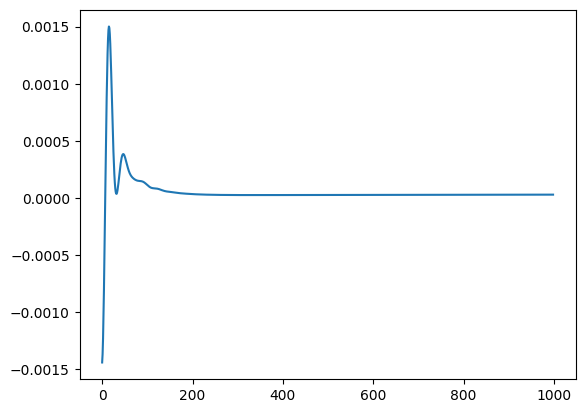

In [53]:
plt.plot(np.arange(0, len(grads), 1), grads)

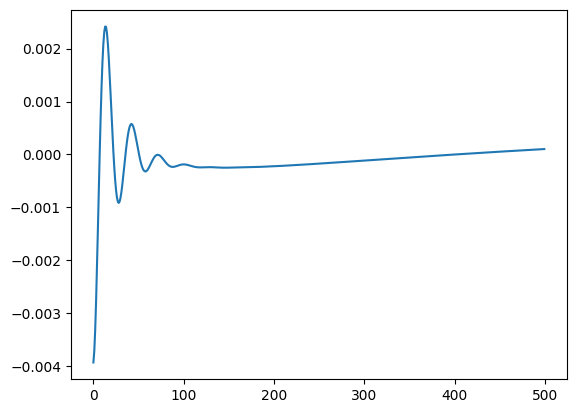

In [51]:
plt.plot(np.arange(0, len(outs), 1), outs)

Epoch [10/5000], Loss: 1.0077
Epoch [20/5000], Loss: 1.0044
Epoch [30/5000], Loss: 1.0013
Epoch [40/5000], Loss: 0.9984
Epoch [50/5000], Loss: 0.9957
Epoch [60/5000], Loss: 0.9932
Epoch [70/5000], Loss: 0.9908
Epoch [80/5000], Loss: 0.9885
Epoch [90/5000], Loss: 0.9863
Epoch [100/5000], Loss: 0.9843
Epoch [110/5000], Loss: 0.9823
Epoch [120/5000], Loss: 0.9804
Epoch [130/5000], Loss: 0.9786
Epoch [140/5000], Loss: 0.9769
Epoch [150/5000], Loss: 0.9752
Epoch [160/5000], Loss: 0.9736
Epoch [170/5000], Loss: 0.9720
Epoch [180/5000], Loss: 0.9704
Epoch [190/5000], Loss: 0.9689
Epoch [200/5000], Loss: 0.9675
Epoch [210/5000], Loss: 0.9660
Epoch [220/5000], Loss: 0.9647
Epoch [230/5000], Loss: 0.9633
Epoch [240/5000], Loss: 0.9619
Epoch [250/5000], Loss: 0.9606
Epoch [260/5000], Loss: 0.9593
Epoch [270/5000], Loss: 0.9580
Epoch [280/5000], Loss: 0.9568
Epoch [290/5000], Loss: 0.9555
Epoch [300/5000], Loss: 0.9543
Epoch [310/5000], Loss: 0.9531
Epoch [320/5000], Loss: 0.9519
Epoch [330/5000],

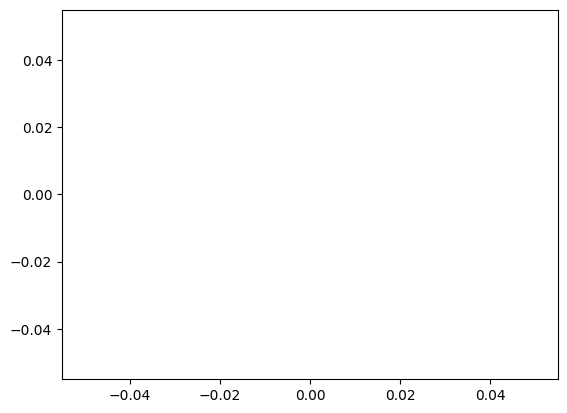

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # First hidden layer, from 2 input features to 64 neurons
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64) # Second hidden layer, 64 neurons
        self.output = nn.Linear(64, 1) # Output layer, 1 output value

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))

        # if self.fc1.weight.grad is not None:
        #     print("fc1 grad: ", torch.mean(self.fc1.weight.grad))
        #     grads.append(torch.mean(self.fc1.weight.grad))
        # if self.fc2.weight.grad is not None:
        #     print("fc2 grad: ", torch.mean(self.fc2.weight.grad))
        x = self.output(x)  # Linear output for regression
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, xs, ys, epochs=5000)
plt.plot(np.arange(0, len(grads), 1), grads)

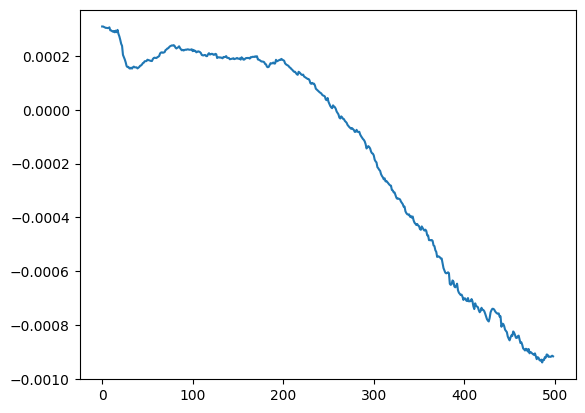

In [55]:
plt.plot(np.arange(0, len(grads), 1), grads)

In [3]:
import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = [random.randint(15, 25) for _ in range(60)]

# List of days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Cycling through days for 60 days
days = [days_of_week[i % 7] for i in range(60)]

# Printing the lists
print("Temperatures:", temperatures)
print("Days:", days)

Temperatures: [21, 19, 15, 19, 16, 23, 19, 18, 15, 19, 15, 20, 25, 19, 19, 23, 17, 24, 19, 16, 16, 18, 16, 21, 24, 22, 22, 15, 20, 16, 15, 25, 25, 18, 20, 25, 21, 15, 15, 18, 22, 22, 21, 19, 25, 24, 19, 19, 20, 19, 19, 17, 24, 16, 20, 17, 15, 15, 18, 24]
Days: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
days = np.arange(1, 61, 1)

In [16]:

import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = [random.randint(15, 25) for _ in range(60)]

smoothing_factor = 0.25
EMA = np.zeros_like(days)
EMA[0] = temperatures[0]

for day in (days - 1):
    EMA[day] = smoothing_factor * temperatures[day] + (1 - smoothing_factor) * EMA[day - 1]

plt.plot(days, temperatures)
plt.plot(days, EMA)
plt.show()

In [19]:
temperatures

[21,
 19,
 15,
 19,
 16,
 23,
 19,
 18,
 15,
 19,
 15,
 20,
 25,
 19,
 19,
 23,
 17,
 24,
 19,
 16,
 16,
 18,
 16,
 21,
 24,
 22,
 22,
 15,
 20,
 16,
 15,
 25,
 25,
 18,
 20,
 25,
 21,
 15,
 15,
 18,
 22,
 22,
 21,
 19,
 25,
 24,
 19,
 19,
 20,
 19,
 19,
 17,
 24,
 16,
 20,
 17,
 15,
 15,
 18,
 24]

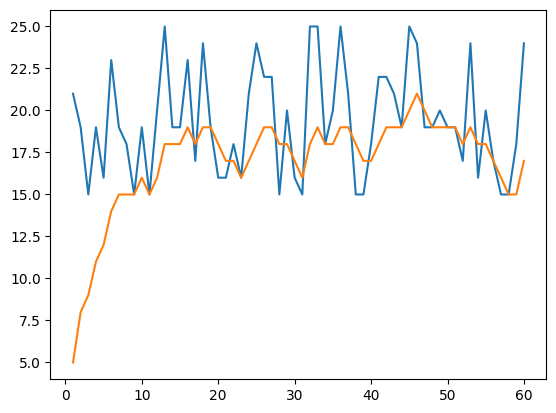

In [18]:
plt.plot(days, temperatures)
plt.plot(days, EMA)
plt.show()

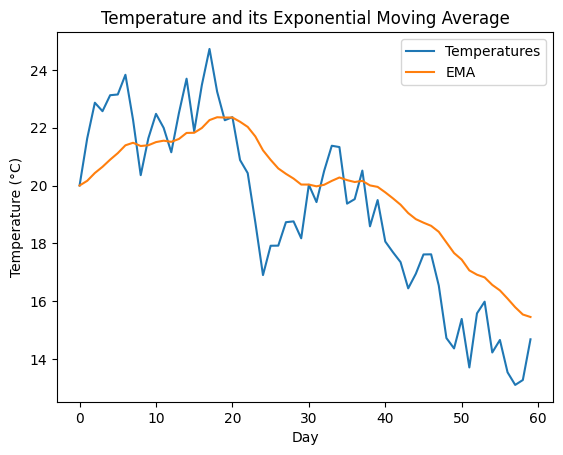

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generating random temperatures between 15°C and 25°C for 60 days
temperatures = generate_temperatures(num_days, start_temp, variability)
days = np.arange(len(temperatures))

smoothing_factor = 0.1
EMA = np.zeros_like(temperatures, dtype=float)
EMA[0] = temperatures[0]  # Initialize the first day's EMA to the first temperature

for day in range(1, len(temperatures)):
    EMA[day] = smoothing_factor * temperatures[day] + (1 - smoothing_factor) * EMA[day - 1]

plt.plot(days, temperatures, label='Temperatures')
plt.plot(days, EMA, label='EMA')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and its Exponential Moving Average')
plt.legend()
plt.show()

In [11]:
momentum = 0.1
damp = 0

der = 0.1

nesterov = False

p = 0

lr = 0.001

vg = 0# will need to be an array
for t in range(100):
    grad = der
    if weight_decay != 0:
        grad = grad + weight_decay * der
    if m != 0:
        if t > 1:
            vg = momentum * vg + (1 - damp) * grad
        else:
            vg = grad
        if nesterov:
            grad = grad + momentum * vg
        else:
            grad = vg
    #update
    p -= lr * grad

NameError: name 'weight_decay' is not defined

In [12]:
# A simple generator function
def my_generator():
    for i in range(5):
        yield i * 2

# Converting the generator to a list
gen = my_generator()
gen_list = list(gen)

In [13]:
gen_list

[0, 2, 4, 6, 8]

In [7]:
my_tensor = Tensor.randn((1, 2)); my_tensor.requires_grad = True
my_tensor[:, 1]._backward()

NotImplementedError: Unsupported indexing type for gradients.

In [2]:
import torch
import numpy as np

class MyLinear:
    @staticmethod
    def kaiming_uniform(in_features, out_features):
        limit = np.sqrt(6 / in_features)
        return np.random.uniform(-limit, limit, (out_features, in_features))

iters = 100000
t_tensor_mean = 0
t_tensor_std = 0

n_tensor_mean = 0
n_tensor_std = 0

for _ in range(iters):
    t_tensor = torch.nn.Linear(1, 30).weight.data
    t_tensor_mean += t_tensor.mean().item()
    t_tensor_std += t_tensor.std().item()

    n_tensor = MyLinear.kaiming_uniform(1, 30)
    n_tensor_mean += n_tensor.mean()
    n_tensor_std += n_tensor.std()

print("Torch Mean:", t_tensor_mean / iters)
print("Torch STD:", t_tensor_std / iters)
print("My Mean:", n_tensor_mean / iters)
print("My STD:", n_tensor_std / iters)

Torch Mean: -0.0003244603184604262
Torch STD: 0.5751914392465353
My Mean: -0.000750900469181584
My STD: 1.3850778110504305


In [39]:
import torch
import numpy as np

def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor.numpy()

iters = 10000
torch_mean = 0
torch_std = 0
numpy_mean = 0
numpy_std = 0

for _ in range(iters):
    t_tensor = torch.nn.Linear(2, 30).weight.data
    torch_mean += t_tensor.mean().item()
    torch_std += t_tensor.std().item()

    n_tensor = kaiming_uniform_np(2, 30)
    numpy_mean += n_tensor.mean()
    numpy_std += n_tensor.std()

print("Torch Mean:", torch_mean / iters)
print("Torch STD:", torch_std / iters)
print("Numpy Mean:", numpy_mean / iters)
print("Numpy STD:", numpy_std / iters)

Torch Mean: 8.4579820484214e-05
Torch STD: 0.40739327497780325
Numpy Mean: 0.0007384616923005524
Numpy STD: 0.9903061203122139


In [37]:
def kaiming_uniform_np(in_features, out_features):
    fan_in = in_features # Ensure this matches PyTorch's definition
    limit = np.sqrt(6 / fan_in)
    return np.random.uniform(-limit, limit, (out_features, in_features))

# Simulate the initialization multiple times to calculate mean and std
iters = 10000
np_mean = 0
np_std = 0

for _ in range(iters):
    np_tensor = kaiming_uniform_np(1, 30)
    np_mean += np_tensor.mean()
    np_std += np_tensor.std()

print("Numpy Mean:", np_mean / iters)
print("Numpy STD:", np_std / iters)

Numpy Mean: -0.0023119615815755967
Numpy STD: 1.385347055945991


In [14]:
import numpy as np

In [37]:
np.array([1, 2]).item()

ValueError: can only convert an array of size 1 to a Python scalar

In [27]:
import torch

In [32]:
torch.randn(1)

tensor([0.5832])

In [39]:
np.full((1, 4), 8)

array([[8, 8, 8, 8]])

In [40]:
my_dict = {"name1":"cameron"}

my_dict["name1"]

'cameron'

In [ ]:
[1, 2, 3, 4]

In [41]:
import torch

In [47]:
x = torch.randn(512)
# Exploading example
for i in range(50):
    a = torch.randn(512, 512)
    x = a @ x
    print(x.mean(), x.std())

tensor(2.1268) tensor(23.3817)
tensor(-5.6826) tensor(510.8918)
tensor(-1156.8750) tensor(11416.5430)
tensor(-1211.1709) tensor(259995.5625)
tensor(82654.7969) tensor(5998119.)
tensor(-1260144.) tensor(1.2920e+08)
tensor(1.3288e+08) tensor(2.9773e+09)
tensor(35317304.) tensor(6.5948e+10)
tensor(3.4869e+10) tensor(1.5240e+12)
tensor(-3.1554e+12) tensor(3.5616e+13)
tensor(1.1933e+12) tensor(7.9529e+14)
tensor(-4.5512e+14) tensor(1.6847e+16)
tensor(-1.2971e+16) tensor(3.7496e+17)
tensor(-4.3987e+17) tensor(8.4896e+18)
tensor(3.8977e+18) tensor(1.9146e+20)
tensor(1.3697e+20) tensor(4.1371e+21)
tensor(1.7246e+21) tensor(9.4103e+22)
tensor(1.2617e+23) tensor(2.0860e+24)
tensor(1.5627e+24) tensor(4.7600e+25)
tensor(7.7842e+25) tensor(1.0837e+27)
tensor(-5.3728e+26) tensor(2.4068e+28)
tensor(-4.0847e+28) tensor(5.6357e+29)
tensor(1.2766e+30) tensor(1.2662e+31)
tensor(9.5614e+30) tensor(2.8317e+32)
tensor(-6.5855e+32) tensor(6.3291e+33)
tensor(1.4202e+34) tensor(1.4623e+35)
tensor(-1.6414e+35) 

In [51]:
x = torch.randn(512)
# Example of vanishing
for i in range(100):
    a = torch.randn(512, 512) * 0.01
    x = a @ x
    print(x.mean(), x.std())

tensor(0.0072) tensor(0.2248)
tensor(-0.0051) tensor(0.0511)
tensor(0.0006) tensor(0.0125)
tensor(-0.0002) tensor(0.0030)
tensor(3.9640e-05) tensor(0.0007)
tensor(-2.5695e-06) tensor(0.0002)
tensor(-2.5081e-07) tensor(3.2846e-05)
tensor(-3.4962e-08) tensor(7.6755e-06)
tensor(9.2107e-08) tensor(1.6888e-06)
tensor(7.5132e-09) tensor(3.8866e-07)
tensor(-3.9068e-09) tensor(8.5848e-08)
tensor(1.2279e-09) tensor(1.9970e-08)
tensor(2.5777e-10) tensor(4.5253e-09)
tensor(-3.7885e-11) tensor(9.9901e-10)
tensor(-3.4424e-12) tensor(2.1738e-10)
tensor(-1.0460e-12) tensor(4.9286e-11)
tensor(4.4081e-13) tensor(1.1053e-11)
tensor(-1.9811e-14) tensor(2.3916e-12)
tensor(3.5693e-14) tensor(5.2769e-13)
tensor(-4.8954e-15) tensor(1.1806e-13)
tensor(-7.3644e-16) tensor(2.5490e-14)
tensor(3.1540e-16) tensor(5.7523e-15)
tensor(4.3490e-19) tensor(1.2991e-15)
tensor(8.2258e-18) tensor(2.8900e-16)
tensor(-4.5377e-18) tensor(6.5267e-17)
tensor(-1.0682e-19) tensor(1.4427e-17)
tensor(-1.5844e-19) tensor(3.0614e-18)

In [52]:
import math

In [68]:
mean, var = 0., 0.
dims = 512
iters = 1
for i in range(iters):
    x = torch.randn(dims)
    a = torch.randn(dims, dims)
    # Layerwise variance
    y = a @ x
    print(y.var())
    mean += y.mean().item()
    var += y.pow(2).mean().item()
print(mean/iters, math.sqrt(var/iters))
print(math.sqrt(dims))

tensor(510.1942)
-0.4683798551559448 22.570270584505906
22.627416997969522


In [79]:
mean, var = 0., 0.
iters = 10000
dims
for i in range(iters):
    x = torch.randn(dims)
    a = torch.randn(dims, dims) * math.sqrt(1/512)
    # Layerwise variance
    y = a@x
    mean += y.mean().item()
    var += y.pow(2).mean().item()
print(mean/iters, var/iters)

-0.00042466135332360866 1.0000457363784314


In [90]:
x = torch.randn(512)
# Exploading example
for i in range(100):
    # Old init strategy before Gorot
    a = torch.Tensor(512, 512).uniform_(-1, 1) * math.sqrt(1/512)
    x = torch.tanh(a @ x)
print(x.mean(), x.std())

tensor(1.0384e-26) tensor(5.4003e-25)


In [96]:
def relu(x):
    return x.clamp_min(0.)

def xaviar(fan_in, fan_out):
    return torch.Tensor(fan_in, fan_out).uniform_(-1, 1) * math.sqrt(6./(fan_in + fan_out))
x = torch.randn(512)
for i in range(100):
    a = xaviar(512, 512)
    x = torch.tanh(a @ x)
print(x.mean(), x.std())

tensor(1.7293e-16) tensor(2.5571e-16)


In [110]:
def relu(x):
    return x.clamp_min(0.)




mean, var = 0., 0.
iters = 5000
dims = 512
for i in range(iters):
    x = torch.randn(dims)
    a = torch.randn(dims, dims) * math.sqrt(2 / 512)
    
    y = relu(a@x)
    mean += y.mean().item()
    var += y.pow(2).mean().item()
print(mean/iters, math.sqrt(var/iters))

0.5626895862340927 0.9983725339441875


In [108]:
math.sqrt(512/2)

16.0

In [1]:
import torch
from engine import Tensor
import nn

import numpy as np

def gradient_check(model, inputs, targets, epsilon=1e-5):
    # Forward pass to compute original loss
    outputs = model(inputs)
    original_loss = ((outputs - targets) ** 2).mean()
    original_loss.backward()

    # Iterate over all parameters in the model
    for name, param in model.parameters():
        if param.requires_grad:
            # Save the original parameter value
            original_data = param.data.copy()

            # Numerical gradient calculation
            numerical_gradient = np.zeros_like(param.data)
            for idx in np.ndindex(param.data.shape):
                # Perturb the parameter by adding epsilon
                param.data[idx] = original_data[idx] + epsilon
                loss_plus = ((model(inputs) - targets) ** 2).mean()

                # Perturb the parameter by subtracting epsilon
                param.data[idx] = original_data[idx] - epsilon
                loss_minus = ((model(inputs) - targets) ** 2).mean()

                # Reset the parameter value
                param.data[idx] = original_data[idx]

                # Calculate numerical gradient
                print(type((loss_plus - loss_minus) / (2 * epsilon)))
                numerical_gradient[idx] = ((loss_plus - loss_minus) / (2 * epsilon))

            # Compare gradients
            analytical_gradient = param.grad
            numerator = np.linalg.norm(analytical_gradient - numerical_gradient)
            denominator = np.linalg.norm(analytical_gradient) + np.linalg.norm(numerical_gradient)
            relative_error = numerator / denominator

            print(f'Gradient check for {name}: relative error {relative_error:.1e}')

# Example usage
# Assume you have some dummy data for inputs and targets
inputs = Tensor(np.random.randn(10, 2))  # Example input
targets = Tensor(np.random.randn(10, 1))  # Example target
model = MLP()  # Your model
gradient_check(model, inputs, targets)


NameError: name 'MLP' is not defined